In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd
Titanic = pd.read_csv('c://Users/ezzan/Downloads/python_drills/titanic.csv')

print(Titanic.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


# Ticket Fare by Alive/Perished (and by gender)


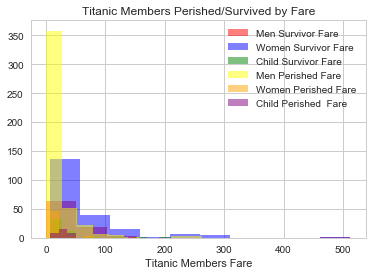

In [63]:


# Creating variables for each of the four conditions to graph using the basic
# matplotlib functionality.
men = Titanic.loc[(Titanic['who']=='man')&(Titanic['alive']=='yes'),'fare']
women = Titanic.loc[(Titanic['who']=='woman')&(Titanic['alive']=='yes'),'fare']
child= Titanic.loc[(Titanic['who']=='child')&(Titanic['alive']=='yes'),'fare']
men_died = Titanic.loc[(Titanic['who']=='man')&(Titanic['alive']=='no'),'fare']
women_died = Titanic.loc[(Titanic['who']=='woman')&(Titanic['alive']=='no'),'fare']
child_died= Titanic.loc[(Titanic['who']=='child')&(Titanic['alive']=='no'),'fare']
# Making overlapping histograms.
plt.hist(men, color='red',  alpha=.5,label='Men Survivor Fare')  # alpha just controls the opacity
plt.hist(women, color='blue', alpha=.5,label='Women Survivor Fare')
plt.hist(child, color='green', alpha=.5,label='Child Survivor Fare')  
plt.hist(men_died, color='yellow', alpha=.5,label='Men Perished Fare')
plt.hist(women_died, color='orange', alpha=.5,label='Women Perished Fare')
plt.hist(child_died, color='purple', alpha=.5,label='Child Perished  Fare')  
plt.xlabel('Titanic Members Fare')
plt.legend(loc='upper right')
plt.title('Titanic Members Perished/Survived by Fare')
plt.show()



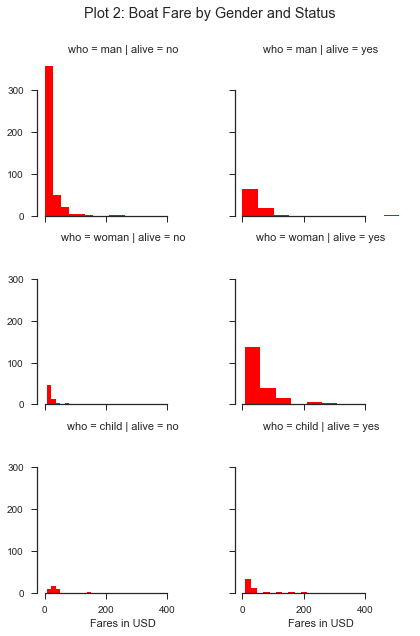

In [64]:

sns.set(style="ticks") 
#heading
g = sns.FacetGrid(Titanic, row="who", col="alive")
g.map(plt.hist, "fare", color="red",  lw=0)
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Fares in USD')
plt.suptitle('Plot 2: Boat Fare by Gender and Status')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()


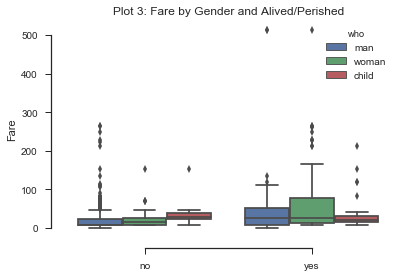

In [65]:

ax = sns.boxplot(x='alive',y='fare',hue='who',data=Titanic)  
plt.title('Plot 3: Fare by Gender and Alived/Perished')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Fare')

plt.show()

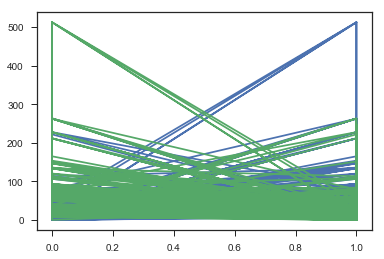

In [66]:
Alive = (Titanic['alive']== 'yes')
Dead = (Titanic['alive']== 'no')

plt.plot(Alive, Titanic['fare'], label= "Survivors Fare")
plt.plot(Dead, Titanic['fare'], label= "Perished Fare")
plt.show()


# Fare based on Class



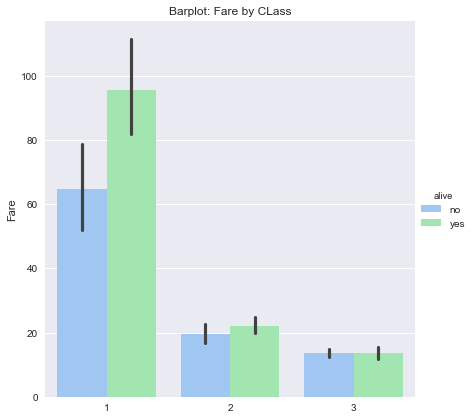

In [45]:

sns.set(style="darkgrid")

g = sns.factorplot(x="pclass", y="fare", hue="alive", data=Titanic,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Fare")
g.set_xlabels("")
plt.title('Barplot: Fare by CLass')
plt.show()




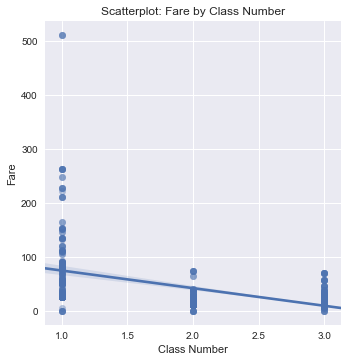

In [46]:
g = sns.lmplot(y='fare', 
               x='pclass', 
               data= Titanic,
               fit_reg=True, 
               scatter_kws={'alpha':0.4}) 
g.set_ylabels("Fare")
g.set_xlabels("Class Number")
plt.title('Scatterplot: Fare by Class Number')
plt.show()

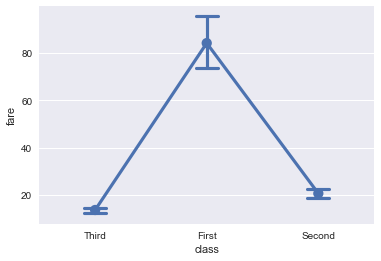

In [47]:
ax = sns.pointplot(x="class", y="fare", data=Titanic, capsize=.2)

In [ ]:

sns.set(style="ticks") 
#heading
g = sns.FacetGrid(Titanic, row="pclass", col="fare")
g.map(plt.hist, "fare", color="red",  lw=0)
plt.subplots_adjust(top=0.9)
g.set_axis_labels('Fare in USD')
plt.suptitle('Plot 2: Passenger Fare of Alive and Perished')
sns.despine(trim=True)
plt.show()


# Fare based on Survived or Perished


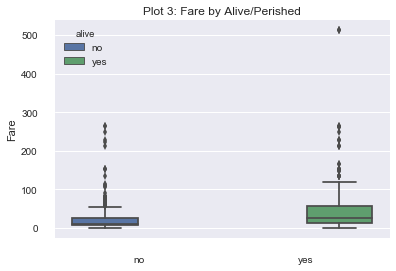

In [51]:

ax = sns.boxplot(x='alive',y='fare',hue='alive',data=Titanic)  
plt.title('Plot 3: Fare by Alive/Perished')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Fare')

plt.show()

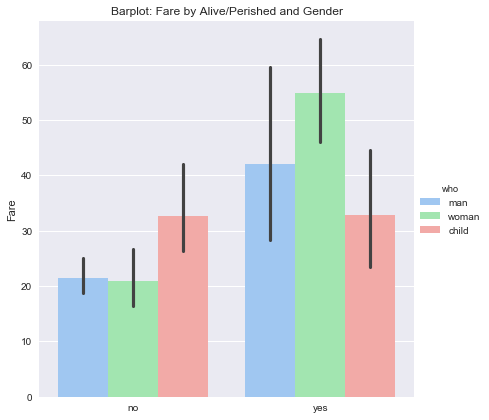

In [53]:
sns.set(style="darkgrid")

g = sns.factorplot(x="alive", y="fare", hue="who", data=Titanic,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Fare")
g.set_xlabels("")
plt.title('Barplot: Fare by Alive/Perished and Gender')
plt.show()

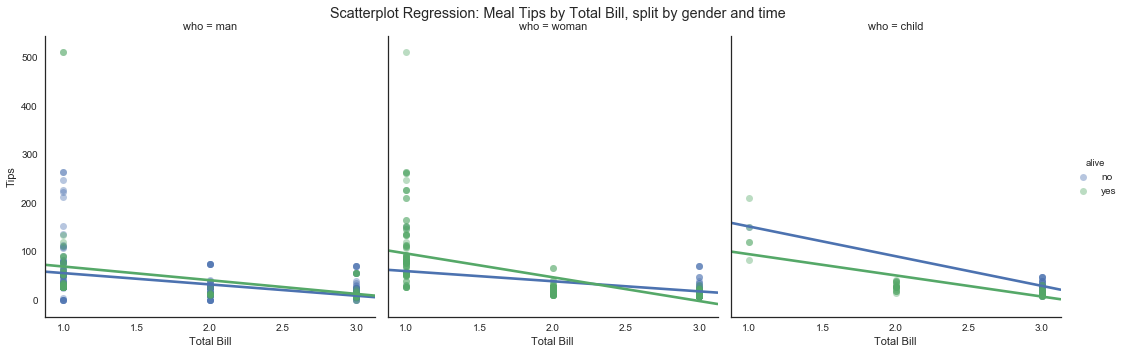

In [55]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='fare', 
               x='pclass',
               hue='alive',
               data=Titanic, # Data.
               col='who',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()


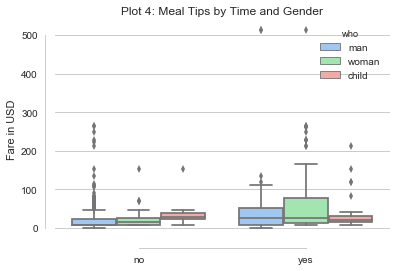

In [57]:

# Setting the overall aesthetic.
sns.set(style="whitegrid")

ax = sns.boxplot(x='alive',y='fare',hue='who',data=Titanic,palette='pastel')  

plt.title('Plot 4: Meal Tips by Time and Gender')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Fare in USD')

plt.show()

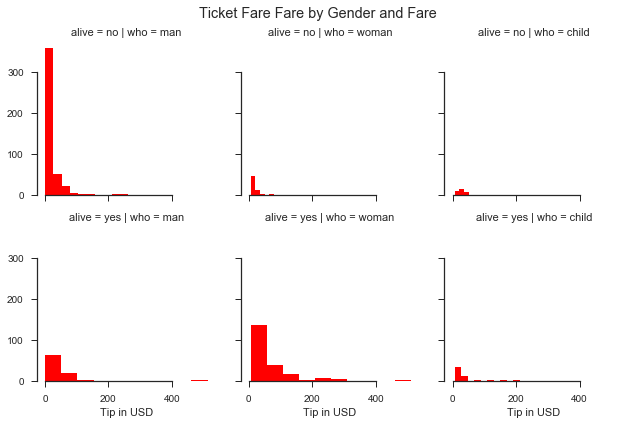

In [61]:

sns.set(style="ticks") 
#heading
g = sns.FacetGrid(Titanic, row="alive", col="who")
g.map(plt.hist, "fare", color="red",  lw=0)
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Tip in USD')
plt.suptitle('Ticket Fare Fare by Gender and Fare')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()


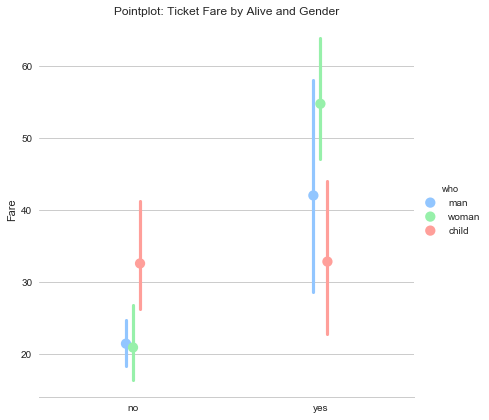

In [62]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.factorplot(x="alive", y="fare", hue="who", data=Titanic,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Fare")
g.set_xlabels("")
plt.title('Pointplot: Ticket Fare by Alive and Gender')
plt.show()